# Titanic - Machine Learning from Disaster

<p>This dataset is based on the infamous shipwreck of the Titanic which sank in the middle of the Atlantic on April 15, 1912. With a combination of factors such as icy cold waters, insufficient life boats, and other failures led that in the death of 1,502 out of 2,224 passengers and crews. 
 <p>Using exploratory data analysis through visualization, we will show which group of people more likely survived this infamous shipwreck based on their attributes using the Titanic dataset from Kaggle. As for the model building, we used two models to test out our dataset and showed which returned the best accuracy score.

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
pip install cufflinks==0.17.3

Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [6]:
# A. Data Cleaning
# data info
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error

# The Data

#### According to the dataset, Pclass stands for the class cabins whether the passenger was in "1st, 2nd, 3rd class" cabins. SibSP stands for "Sibling" (brother, sister, stepbrother, stepsister) and "Spouse" (husband, wife). Parch stands for "Parent" (mother, father) and "Child" (daughter, son, stepdaughter, stepson)

In [7]:
titanic = pd.read_csv('train.csv')
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis 

## Missing Data

<AxesSubplot:>

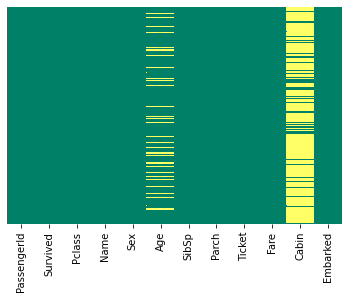

In [8]:
sns.heatmap(titanic.isnull(),yticklabels=False, cbar=False, cmap='summer')

#### This heatmap shows that the Age column is missing some data, the Cabin column looks like it is missing too much data, and embarked column is missing one row of data.

<AxesSubplot:xlabel='Survived', ylabel='count'>

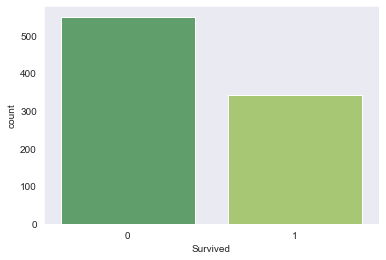

In [9]:
sns.set_style ('dark')
sns.countplot(x='Survived', data=titanic, palette='summer')

### 0 is the # of people deceased and 1 is the # of people who survived. Their are more passengers that died than survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

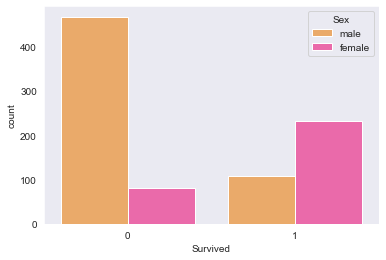

In [10]:
sns.countplot(x='Survived', hue='Sex', data=titanic, palette ='spring_r')

#### The plot above shows a trend that most of those who did not survive were most likely male while those who survived are twice more likely to be female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

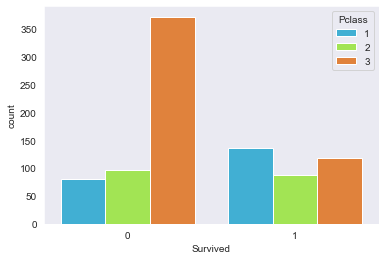

In [11]:
sns.countplot(x='Survived', hue='Pclass',data=titanic, palette='turbo')

#### The people who did not survived were overwhelmingly part of the 3rd class or the lowest class while most of those who survived were leaning towards the higher class or 1st class.

<AxesSubplot:ylabel='Frequency'>

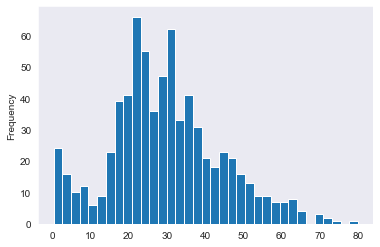

In [12]:
titanic['Age'].plot.hist(bins=35)

#### There's quite a few children from 0 to 10 years old and then there's a skewed pattern more toward the younger passengers ages 20-30 years old.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

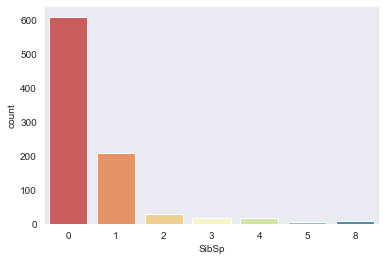

In [13]:
sns.countplot(x='SibSp',data=titanic, palette='Spectral')

#### We can immediately tell that most of the passengers on board did not have children or spouse onboard, most were single. 

<AxesSubplot:ylabel='Frequency'>

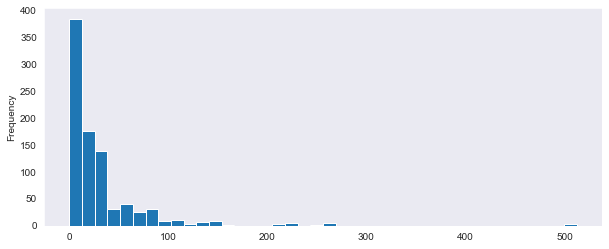

In [14]:
titanic['Fare'].plot.hist(bins=40,figsize=(10,4))

#### Most of the purchase prices are between 0 to 50 towards the cheaper fare tickets because most of the passengers are in third class.

In [15]:
import cufflinks as cf
cf.go_offline()
titanic['Fare'].iplot(kind='hist',bins=50)

#### Here's a more interactive plot to show actual counts and exploit the data.

# Data Cleaning

### We want to fill in missing data for the age column instead of just dropping the missing age data rows.

<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

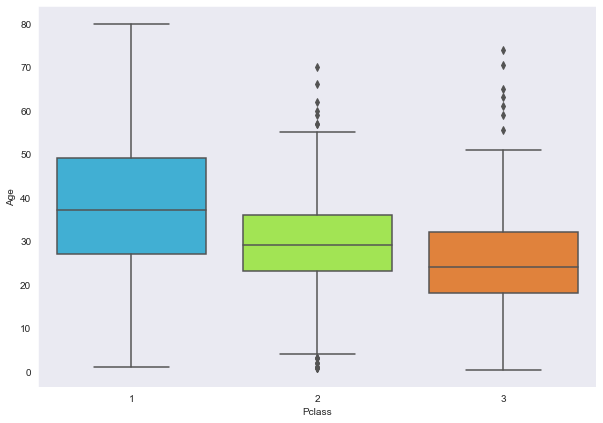

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age', data=titanic,palette='turbo')

#### The plot shows above that the wealthier passengers in the first and second class tend to be older than the passengers in the third class.

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

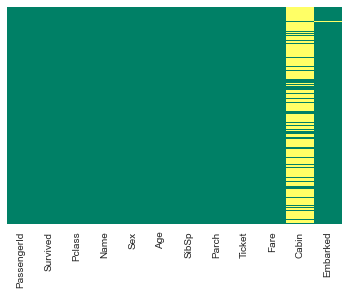

In [19]:
sns.heatmap(titanic.isnull(),yticklabels=False, cbar=False, cmap='summer')

#### The plot above shows we no longer have missing data on the Age column. On the other hand, the Cabin column is missing too much data and so it makes sense to drop it.

In [20]:
titanic.drop('Cabin',axis=1,inplace=True)

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

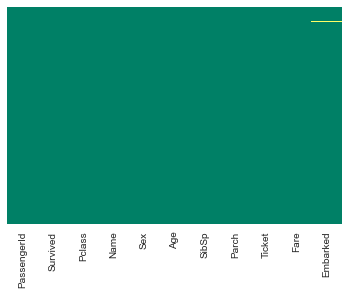

In [22]:
sns.heatmap(titanic.isnull(),yticklabels=False, cbar=False, cmap='summer')

#### Now we're just missing a value at the Embarked column.

In [23]:
titanic.dropna(inplace=True)

<AxesSubplot:>

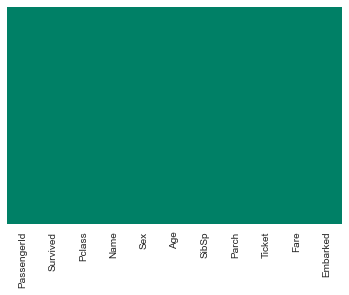

In [24]:
sns.heatmap(titanic.isnull(),yticklabels=False, cbar=False, cmap='summer')

#### Now our heatmap shows we have no missing values.

## Converting Categorical features into dummy variable using pandas.

In [25]:
#Getting the Sex column into a machine learning algorithm column

sex = pd.get_dummies(titanic['Sex'],drop_first=True) 
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
pclass = pd.get_dummies(titanic['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [28]:
# Add the new columns to our data frame
titanic = pd.concat([titanic,sex,embark,pclass],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [29]:
#Now we don't need the Embarked column since we already encoded it as Q and S and we don't need
# the Sex column since we encoded it with the male column. 
# We don't need the Name and Ticket columns since we don't have enough information there for us to use it for machine learning.

titanic.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [30]:
# We don't need the PassengerID column since it's essentially an index that starts at 1.
titanic.drop('PassengerId',axis=1,inplace=True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


#### Our data is now ready for a machine learning algorithm. All the data is numerical and everything is concatenated together.

# Model Building


In [145]:
X = titanic.drop('Survived',axis=1).values
y = titanic['Survived']

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

### 1. Logistic Regression

In [148]:
#Train and Predict
from sklearn.linear_model import LogisticRegression

In [149]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/lilian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [151]:
y_pred = logmodel.predict(X_test)
print(accuracy_score(y_pred, y_test)*100, "for the test data")

82.77153558052434 for the test data


In [152]:
y_pred_train = logmodel.predict(X_train)
print(accuracy_score(y_pred_train, y_train) *100,"for the train data")

80.86816720257235 for the train data


In [164]:

print(logmodel.score(X_test,y_test)*100)

82.77153558052434


### A score of 82.7% for the Logistic Regression classifier.

### 2. Decision Tree model

In [157]:
# Decision Tree Classification
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test)*100,"for the test data")

DecisionTreeClassifier(max_depth=5)

83.52059925093633 for the test data


In [154]:
y_pred_train = clf.predict(X_train)
print(accuracy_score(y_pred_train, y_train)*100,
      "for the train data")

83.92282958199357 for the train data


In [158]:
clf.score(X_test,y_test)

0.8352059925093633

### A score of 83.5% for the Decision Tree Classifier.

# Conclusions

We tested both a Logistic Regression model which is a binary classifier, and and Decision Tree Classifier. The Logistic Regression returned an accuracy score of 83% while Decision Tree Classifier returned an accuracy score of 84%. The Decision Tree Classifier performed better because it shows no variation in test and train data accuracy and showed a higher accuracy score.
